# Classification tree for diabetes

### Response:
**DIABBC** is a `categorial variable`, the value has different meaning:
- 1: Ever told has diabetes mellitus, still current and long term
- 5: Never told has diabetes mellitus

### Predictors: （需要改）
- 'AGEC', 
- 'SEX', 
- 'INCDEC', 
- 'BMISC', 
- 'DIETRDI', 
- 'ZINCT_MEAN',
- 'Vegan_indicator', 
- 'RedMeat_indicator', 
- 'SELT_MEAN',
- 'EatingType_Carbohydrate', 'EatingType_JunkFood', 'EatingType_Mixed','EatingType_Other', 'EatingType_Protein', 'EatingType_Vege'


#### Dataset:
- remove missing values
- remove outliers
- remove children (age < 18)
- remove currently pregnant (sabdyms = 4)
- remove the group DIABBC = 3 as too few people in this group

### Model Goal:
Predict whether or not a patient has diabetes, based on certain diagnostic measurements


# Result：
With 30% data as the test data, the overall accuracy (correct prediction) is around 75%
From the tree below we can see that: 
1. **The most important predictors are `AGE`, `BMISC`, `INCDEC`**
2. **The other important variables are `SELT_MEAN`, and `ZINCT_MEAN`**
3. **Other variable seems not useful: Vegan_indicator, RedMeat_indicator, DIETRDI, EatingType**


In [71]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation

In [95]:
pima = pd.read_csv("data/selected_columns_14Oct.csv")
pima = pima[1:]
pima.head(3)

,DIABBC,AGEC,SEX,INCDEC,EXLWTBC,BMISC,DIETRDI,ZINCT_MEAN,RedMeat_indicator,SELT_MEAN
1,No,46,2,9.0,80,20.91,2.0,14.69,1,220.110001
2,No,46,2,9.0,80,20.91,2.0,14.69,1,220.110001
3,No,46,2,9.0,80,20.91,2.0,14.69,1,220.110001


In [96]:
### Convert DIETRDI and COMBCODE into categorical columns

#pima["COMBCODE"] = pima["COMBCODE"].astype('category')
#pima["DIETRDI"] = pima["DIETRDI"].astype('category')
pima["DIABBC"] = pima["DIABBC"].astype('category')
#pima = pd.get_dummies(pima, columns=["EatingType"])
pima = pima.dropna() # drop all missing values
pima.head(3)

,DIABBC,AGEC,SEX,INCDEC,EXLWTBC,BMISC,DIETRDI,ZINCT_MEAN,RedMeat_indicator,SELT_MEAN
1,No,46,2,9.0,80,20.91,2.0,14.69,1,220.110001
2,No,46,2,9.0,80,20.91,2.0,14.69,1,220.110001
3,No,46,2,9.0,80,20.91,2.0,14.69,1,220.110001


In [74]:
pima.size

1638500

In [75]:
### Convert Diabbc to 1 or 0
def label_response(row):
    """
    For red meat (MEAT1N(nutr)) 
    Where 0 intake of either/each = vegetarian/ vegan 
    """
    if row["DIABBC"] == "No":
        return 0 # health
    else:
        return 1

In [76]:
pima['DIABBC'] = pima.apply (lambda row: label_response(row), axis=1)

In [77]:
pima.DIABBC.value_counts()

0    152826
1     11024
Name: DIABBC, dtype: int64

### Baseline: decision tree on unbalanced dataset

In [78]:
#split dataset in features and target variable
feature_cols = ["AGEC","SEX", "INCDEC", "EXLWTBC", "BMISC", "DIETRDI","ZINCT_MEAN", 
              "RedMeat_indicator", "SELT_MEAN"]
X = pima[feature_cols] # Features
y = pima.DIABBC # Target variable


# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [79]:
clf = DecisionTreeClassifier(max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

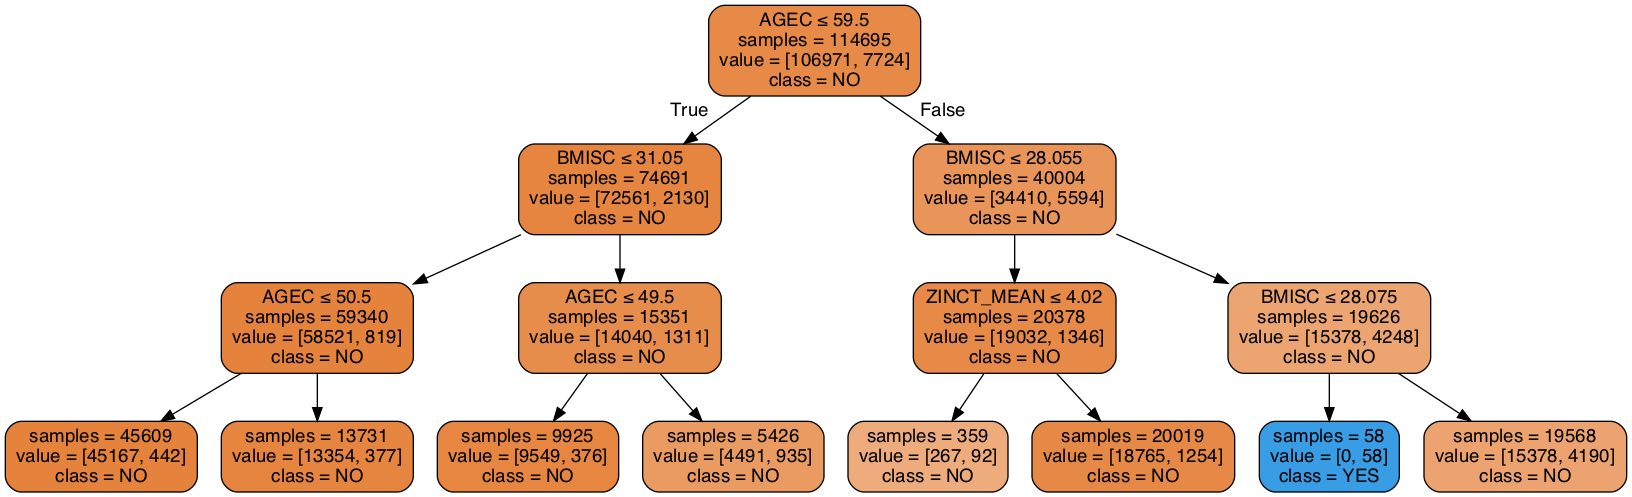

In [80]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz  # function generates a GraphViz representation of the decision tree
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, 
                rounded=True,
                #proportion = True,
                special_characters=True,
                impurity=False,  # hide gini rule
                feature_names = feature_cols,
                class_names=['NO','YES']
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

## Model evaluation

Reason to add confusion matrix: We select model based on accuracy, but accuracy is just a summary of all classes performance, so to see individual class performance, we should draw confusion matrix. Also, it is good to consider Precision Recall, ROC for each classes.

Based on the test data

### Confusion Matrix

In [81]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9332519580917505


In [82]:
from sklearn.metrics import classification_report, confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def plot_normalized_confusion_matrix(y_true, y_pred, title):
    #y_true = np.concatenate([y for x, y in val_ds], axis=0)
    cm = confusion_matrix(y_true, y_pred)
    cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    fig, ax = plt.subplots(figsize=(8,5))
    fig.suptitle(title,fontsize=20)
    ax.set_xlabel("Preidicted_Label")
    ax.set_ylabel('True_Label')
    #plt.xticks(np.arange(0, 60), np.arange(1,60))
    sns.heatmap(cmn, annot=True, fmt='.2f', linewidths=.8,)
    #image_path = 'image/' + model +'_normalized_confusion_matrix.png'
    #fig.savefig(image_path)   
    #plt.close(fig)
    plt.show()  

In [83]:
def draw_confusion_matrix(model, y_pred, y_true):
    
    print('Confusion Matrix, x label is Predicted_Label, y is True_Label')
    
    plot_normalized_confusion_matrix(y_true, y_pred, "Normalized Confusion Matrix") # self-defined function
    
    print('Classification Report bazed on test data')
    print(classification_report(y_true, y_pred))

Confusion Matrix, x label is Predicted_Label, y is True_Label


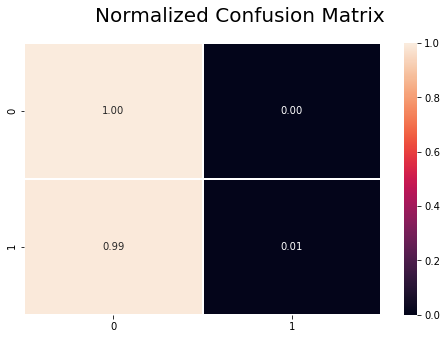

Classification Report bazed on test data
              precision    recall  f1-score   support

           0       0.93      1.00      0.97     45855
           1       1.00      0.01      0.01      3300

    accuracy                           0.93     49155
   macro avg       0.97      0.50      0.49     49155
weighted avg       0.94      0.93      0.90     49155



In [84]:
draw_confusion_matrix(clf, y_pred, y_test)

Without balance, we can see that model classify most diabete to healthy, which is incorrect!

# Balance dataset: Up-sample Minority Class

In [85]:
# Separate majority and minority classes
df_majority = pima[pima.DIABBC==0] # health group
df_minority = pima[pima.DIABBC==1]


In [86]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = pima[pima.DIABBC==0] # health group
df_minority = pima[pima.DIABBC==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=df_majority.shape[0],    # same size as majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.DIABBC.value_counts()
# 1    576
# 0    576
# Name: balance, dtype: int64

1    152826
0    152826
Name: DIABBC, dtype: int64

### Split train and test dataset

In [87]:
#split dataset in features and target variable
feature_cols = ["AGEC","SEX", "INCDEC", "EXLWTBC", "BMISC", "DIETRDI","ZINCT_MEAN", 
              "RedMeat_indicator", "SELT_MEAN"]
X = df_upsampled[feature_cols] # Features
y = df_upsampled.DIABBC # Target variable

In [88]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1) # 80% training and 20% test

## Building Decision Tree Model¶

In [89]:
clf = DecisionTreeClassifier(max_depth=3)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7480001962997497


# Visualizing Decision Trees¶

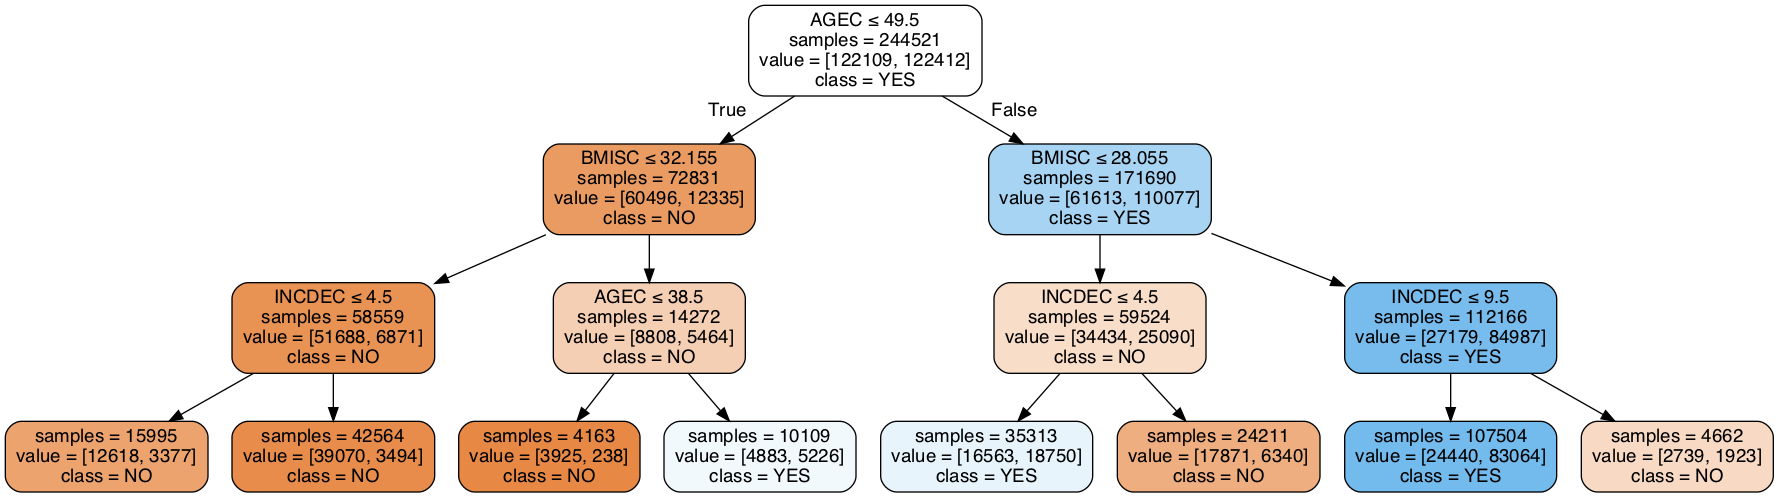

In [90]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz  # function generates a GraphViz representation of the decision tree
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, 
                rounded=True,
                #proportion = True,
                special_characters=True,
                impurity=False,  # hide gini rule
                feature_names = feature_cols,
                class_names=['NO','YES']
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Confusion Matrix, x label is Predicted_Label, y is True_Label


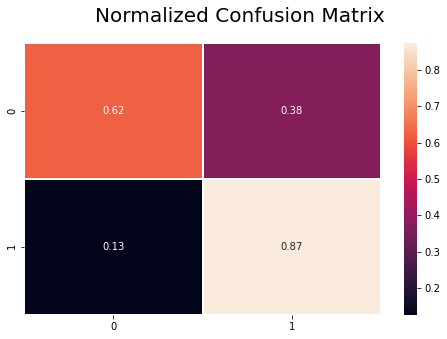

Classification Report bazed on test data
              precision    recall  f1-score   support

           0       0.83      0.62      0.71     30717
           1       0.70      0.87      0.78     30414

    accuracy                           0.75     61131
   macro avg       0.77      0.75      0.74     61131
weighted avg       0.77      0.75      0.74     61131



In [91]:
draw_confusion_matrix(clf, y_pred, y_test)

In [92]:
clf = DecisionTreeClassifier(max_depth=4)
# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7631479936529748


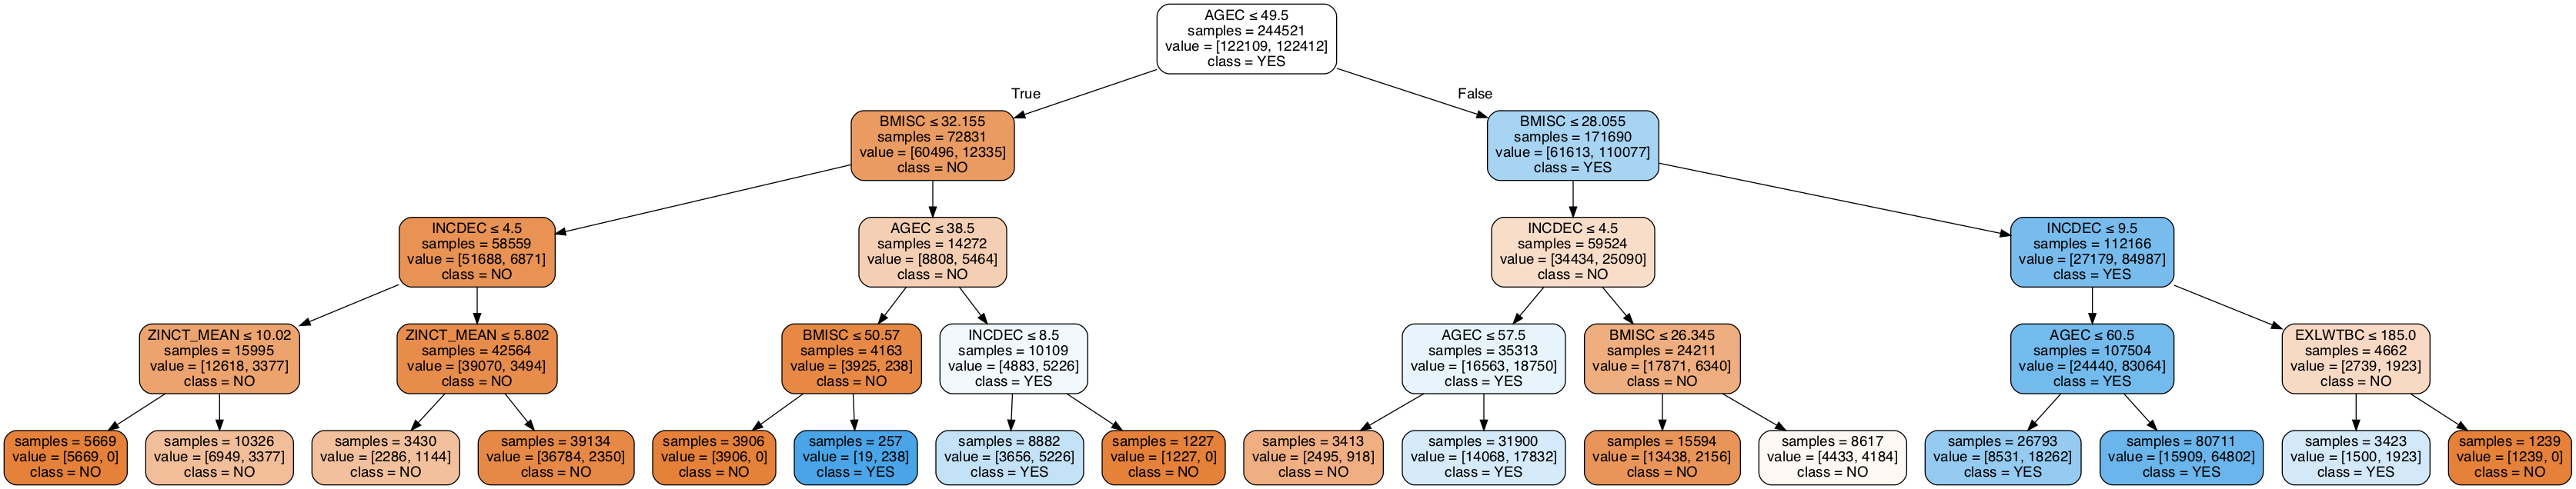

In [93]:

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, 
                rounded=True,
                #proportion = True,
                special_characters=True,
                impurity=False,  # hide gini rule
                feature_names = feature_cols,
                class_names=['NO','YES']
               )
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

Confusion Matrix, x label is Predicted_Label, y is True_Label


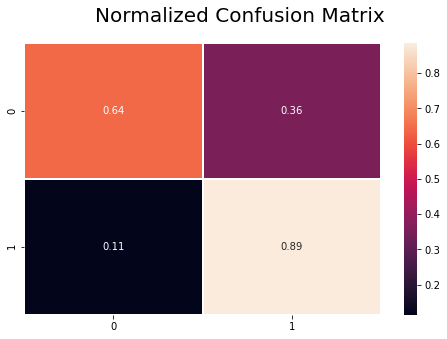

Classification Report bazed on test data
              precision    recall  f1-score   support

           0       0.85      0.64      0.73     30717
           1       0.71      0.89      0.79     30414

    accuracy                           0.76     61131
   macro avg       0.78      0.76      0.76     61131
weighted avg       0.78      0.76      0.76     61131



In [94]:
draw_confusion_matrix(clf, y_pred, y_test)

From the tree above we can see that: 
1. The most important predictors are `AGE`, `BMISC`, `INCDEC`
2. The other important variables are `SELT_MEAN`, and `ZINCT_MEAN`
3. Other variable seems not useful: Vegan_indicator, RedMeat_indicator, DIETRDI, EatingType